## Data Cleaning for New York City Airbnb Data

## Project Overview
This Project is about cleaning NYC Airbnb dataset to make it ready for Analysis. The raw data has issues like missing values, duplicates and inconsistent formats. Through proper cleaning steps, the dataset was made accurate and releable for futhure use.

## Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Exploration

In [25]:
# Load Dataset
df = pd.read_csv(r'AB_NYC_2019.csv')

In [27]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
# Chech top 5 Rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [31]:
# Check bottom 5 Rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [33]:
# Check Shape of Data
df.shape

(48895, 16)

In [35]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [37]:
# No. of Unique Values in each Columns
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [39]:
# Statistical summery for Numerical Columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
# Statistical Summery for Categorical Columns
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,6/23/2019
freq,18,417,21661,3920,25409,1413


In [43]:
# Check null Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Cleaning & Preprocessing

In [46]:
# Chcek Duplicates
df.duplicated().sum()

np.int64(0)

##### Handling Null Values

In [49]:
# Drop rows where 'name' or 'host_name' is missing
df = df.dropna(subset=['name', 'host_name'])

In [51]:
# Confirm after dropping
print("Missing values after:")
print(df[['name', 'host_name']].isnull().sum())

Missing values after:
name         0
host_name    0
dtype: int64


In [53]:
# Check missing values before handling
print("Missing values before:")
print(df[['last_review', 'reviews_per_month']].isnull().sum())

Missing values before:
last_review          10037
reviews_per_month    10037
dtype: int64


In [55]:
# Fill missing 'last_review' with a placeholder 'No Review'
df['last_review'] = df['last_review'].fillna("No Review")

In [57]:
# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [59]:
# Check again after filling
print("Missing values after:")
print(df[['last_review', 'reviews_per_month']].isnull().sum())

Missing values after:
last_review          0
reviews_per_month    0
dtype: int64


## Exploratory Data Analysis

#### Univariate Analysis

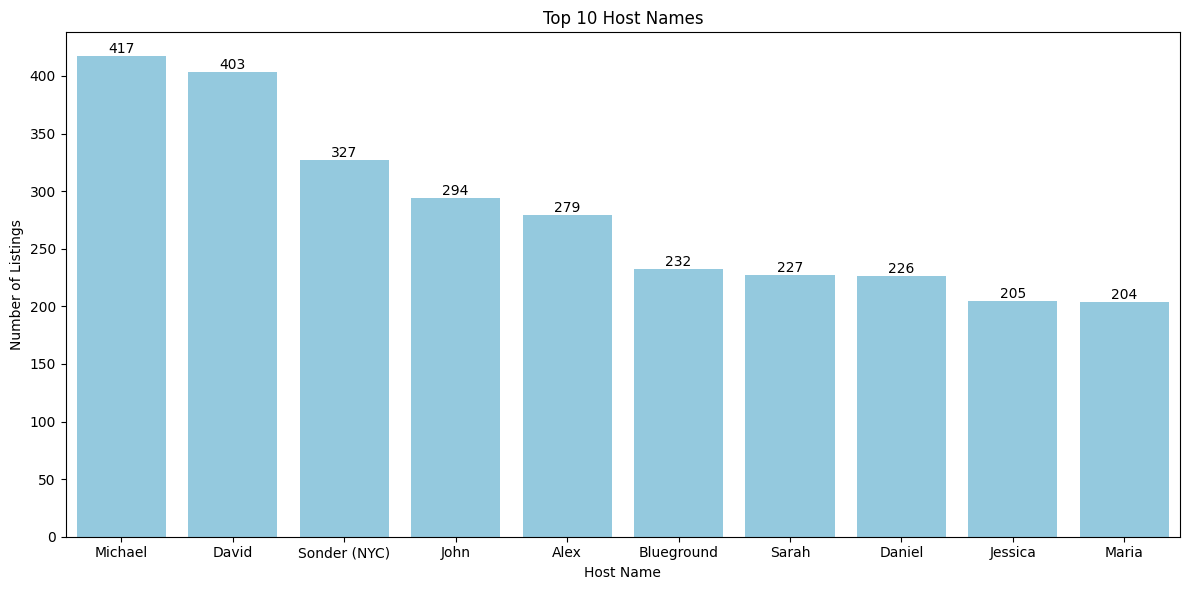

In [63]:
# Top 10 Host Name

# Count host_name frequencies
host_listing_counts = df['host_name'].value_counts().head(10)
# Plot
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=host_listing_counts.index, y=host_listing_counts.values, color='skyblue')
plt.title('Top 10 Host Names')
for bar in plot.containers:
    plot.bar_label(bar, size=10)
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

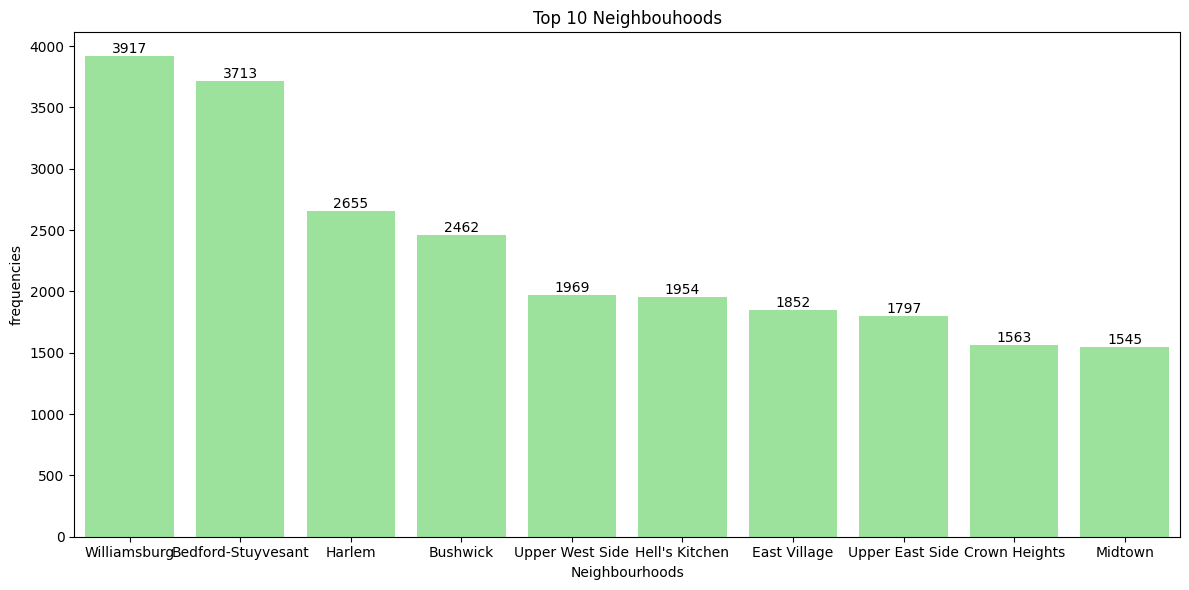

In [65]:
# Top 10 Neighbourhoods

# Count neghbourhoods frequencies
top_neighbours_counts = df['neighbourhood'].value_counts().head(10)
# Plot
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=top_neighbours_counts.index, y=top_neighbours_counts.values, color='lightgreen')
plt.title('Top 10 Neighbouhoods')
for bar in plot.containers:
    plot.bar_label(bar, size=10)
plt.xlabel('Neighbourhoods')
plt.ylabel('frequencies')
plt.tight_layout()
plt.show()

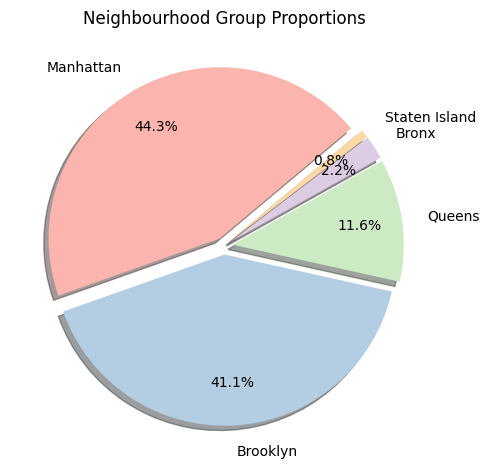

In [66]:
# Neghbourhood Group Distribution

# Count unique neghbourhood group
neghbourhood_group_counts = df['neighbourhood_group'].value_counts()
# Plot
plt.figure(figsize=(5, 5))
neghbourhood_group_counts.plot.pie(autopct='%1.1f%%', explode=[0.05]*df['neighbourhood_group'].nunique(),
                                   colors=plt.cm.Pastel1.colors, labeldistance=1.15, pctdistance=0.75, startangle=40, shadow=True)
plt.title('Neighbourhood Group Proportions')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [69]:
neghbourhood_group_counts

neighbourhood_group
Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: count, dtype: int64

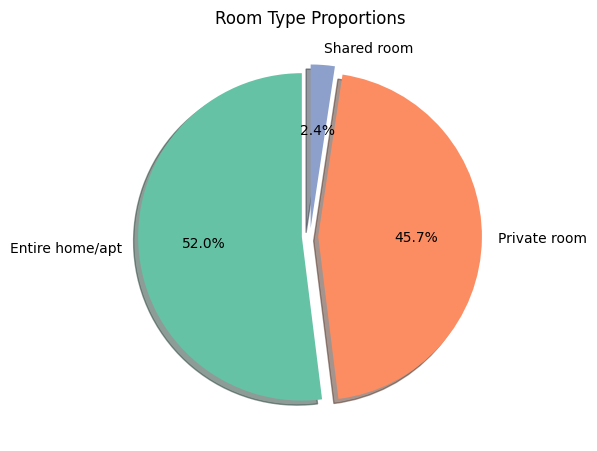

In [71]:
# Room Type Distribution

# Count unique room types
room_type_counts = df['room_type'].value_counts()
# Plot
plt.figure(figsize=(6, 6))
room_type_counts.plot.pie(autopct='%1.1f%%', explode=[0.05]*df['room_type'].nunique(),
                          colors=sns.color_palette('Set2'), startangle=90, shadow=True)
plt.title('Room Type Proportions')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [73]:
room_type_counts

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64

#### Bivariate Analysis

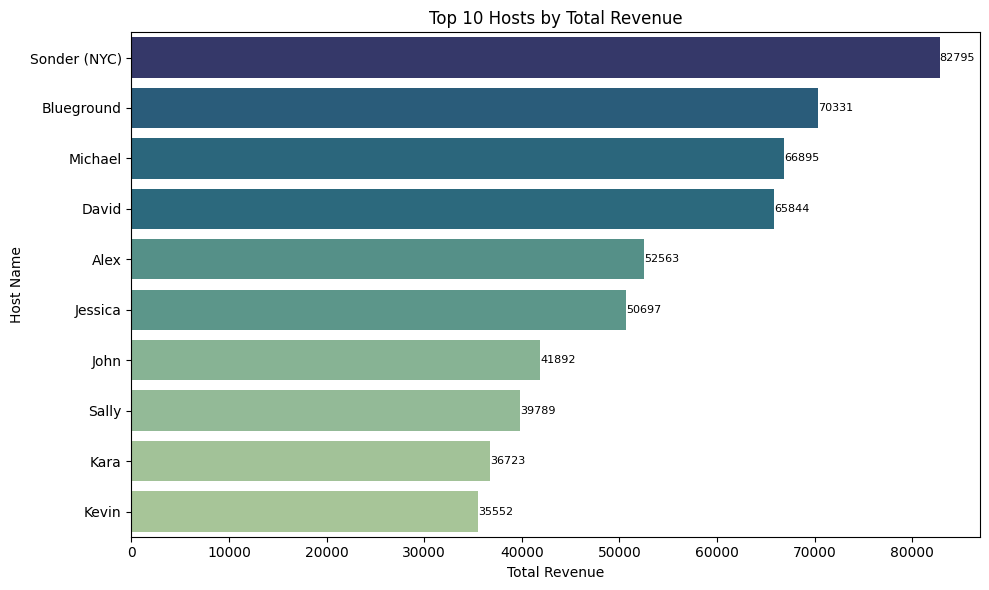

In [76]:
# Top 10 hosts by total price (revenue)

top_hosts_by_price = df.groupby('host_name')['price'].sum().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=top_hosts_by_price.values, y=top_hosts_by_price.index, hue=top_hosts_by_price, legend=False, palette='crest')
plt.title("Top 10 Hosts by Total Revenue")
for bar in plot.containers:
    plot.bar_label(bar, size=8)
plt.xlabel("Total Revenue")
plt.ylabel("Host Name")
plt.tight_layout()
plt.show()

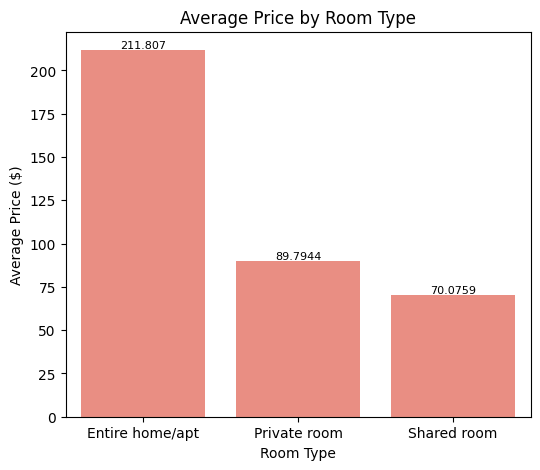

In [77]:
# Average Price per Room Type

plt.figure(figsize=(6, 5))
room_price_mean = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
# Plot
plot = sns.barplot(x=room_price_mean.index, y=room_price_mean.values, color='salmon')
plt.title('Average Price by Room Type')
for bar in plot.containers:
    plot.bar_label(bar, size=8)
plt.ylabel('Average Price ($)')
plt.xlabel('Room Type')
plt.show()

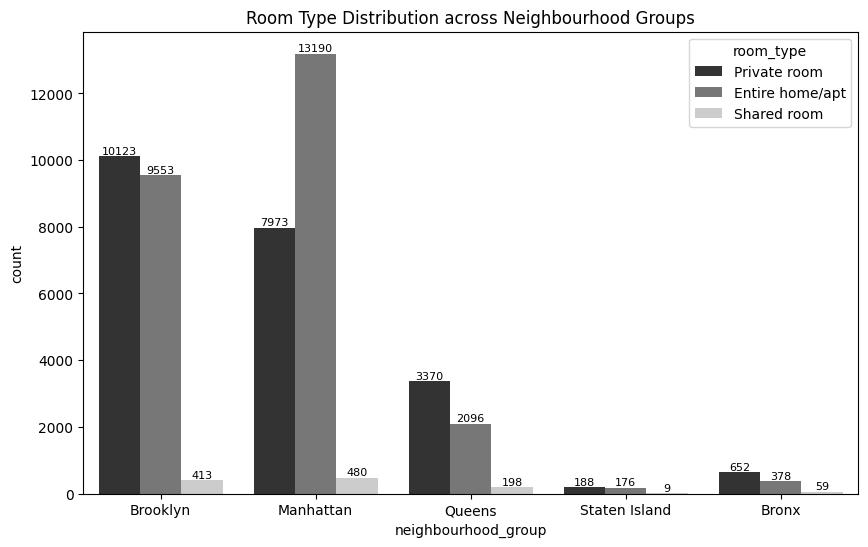

In [80]:
# Neighbourhood Group vs Room Type

plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette = ['#333333', '#777777', '#CCCCCC'])
plt.title('Room Type Distribution across Neighbourhood Groups')
for bar in plot.containers:
    plot.bar_label(bar, size=8)
plt.show()

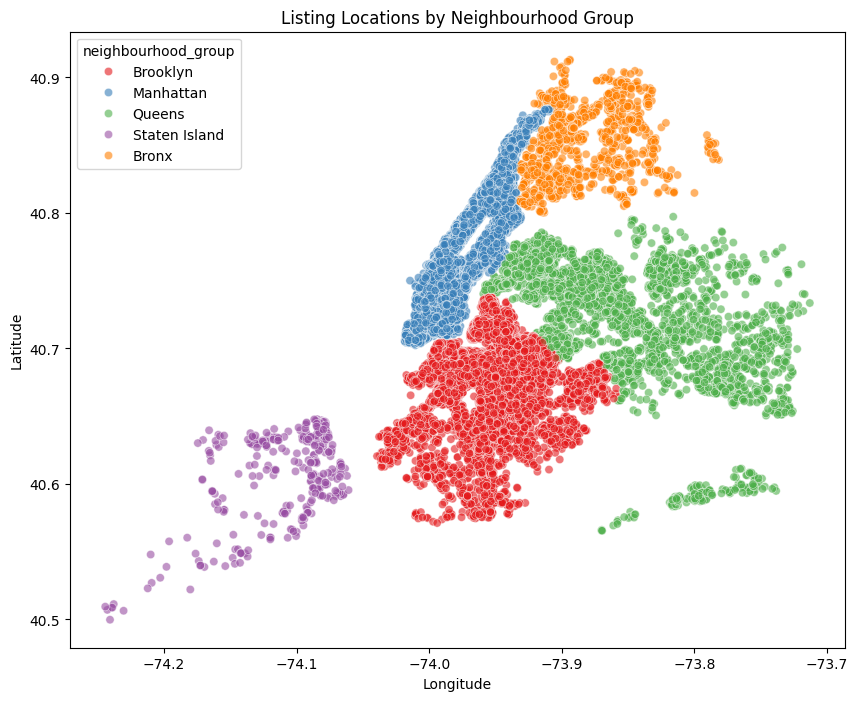

In [81]:
# Scatter Plot on Map(Latitude vs Longitude)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='Set1', alpha=0.6)
plt.title('Listing Locations by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

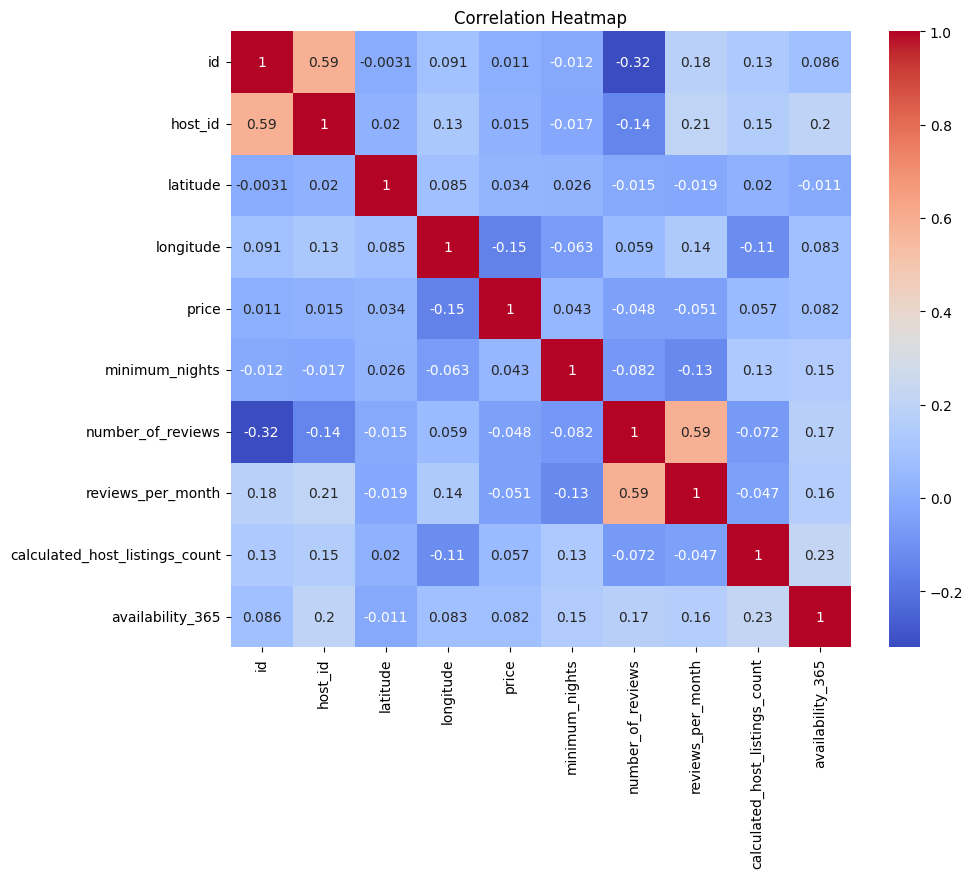

In [83]:
# # Correlation Heatmap for all Numeric Columns

# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()